# Automobiles Analytics


In [18]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.style.use('ggplot')

<Figure size 1000x800 with 0 Axes>

In [2]:
file = 'Automobile.csv'

In [3]:
df = pd.read_csv(file)
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


There is null values on horsepower columns

In [5]:
#Re-Check
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [7]:
df.count()

name            398
mpg             398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model_year      398
origin          398
dtype: int64

There are two 'easy' options to handle the missing value :
- Delete the row that contains missing value. Since the missing value is not that much, could be doesnt really affect on the data itself
- Using statistical methods like average to handle.

since null value less than 25% of the data. We can use the first method

In [8]:
#Method 1 - Deleting Row

df2 = df.copy()
df2 = df2.drop(labels=df2[df2.horsepower.isnull()].index, axis=0)
df2

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [9]:
df2.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

## Univariate Analytics

In [10]:
# Let's see the least gas efficient to the most efficient car / mpg
# higher the number indicates good effiecieny

sorted = df2.sort_values('mpg',ascending=True)
sorted.reset_index(drop=True,inplace=True)
sorted

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,usa
1,chevy c20,10.0,8,307.0,200.0,4376,15.0,70,usa
2,ford f250,10.0,8,360.0,215.0,4615,14.0,70,usa
3,dodge d200,11.0,8,318.0,210.0,4382,13.5,70,usa
4,oldsmobile omega,11.0,8,350.0,180.0,3664,11.0,73,usa
...,...,...,...,...,...,...,...,...,...
387,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,80,europe
388,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
389,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe
390,honda civic 1500 gl,44.6,4,91.0,67.0,1850,13.8,80,japan


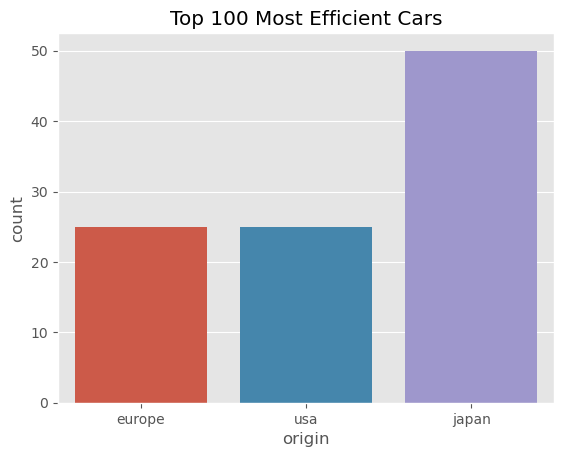

In [20]:
sns.countplot(data=sorted.tail(100),x=sorted.tail(100).origin)
plt.title('Top 100 Most Efficient Cars')
plt.show()

Japan has the most efficent Cars

In [25]:
featured = df2.drop(columns=['name','origin'],axis=0)
featured

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


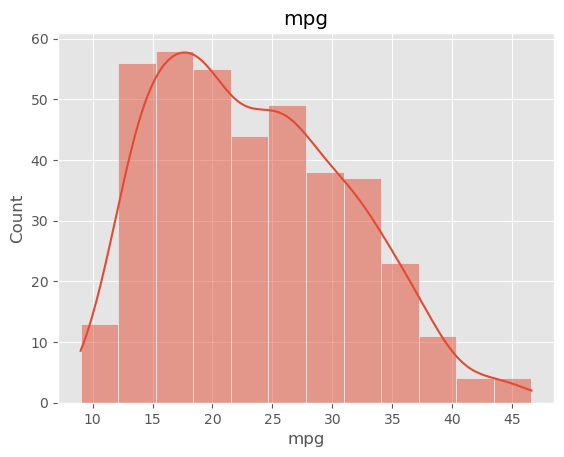

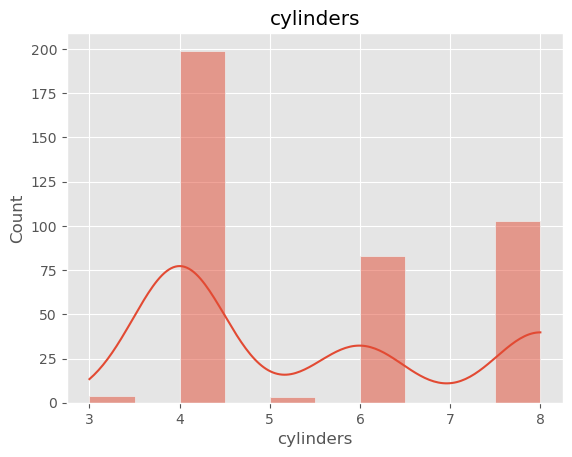

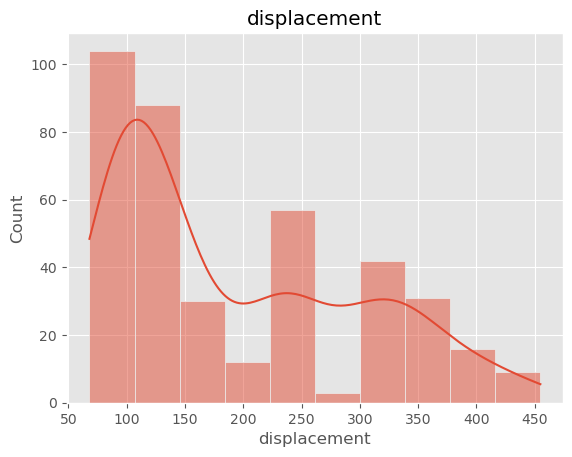

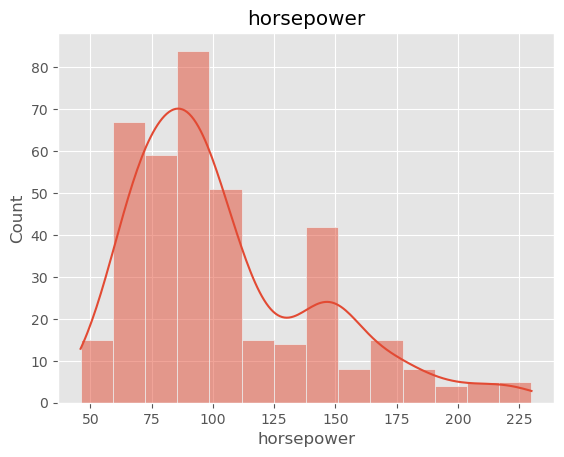

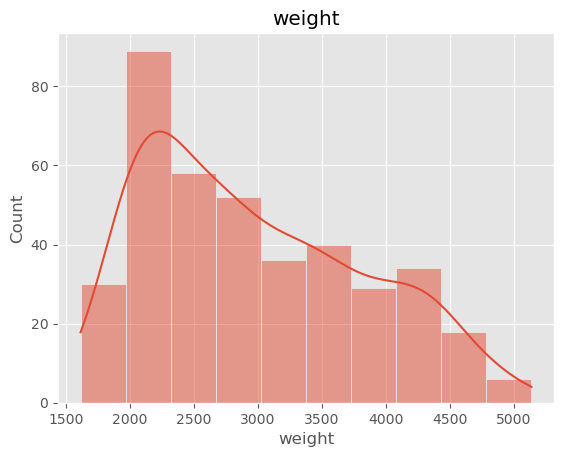

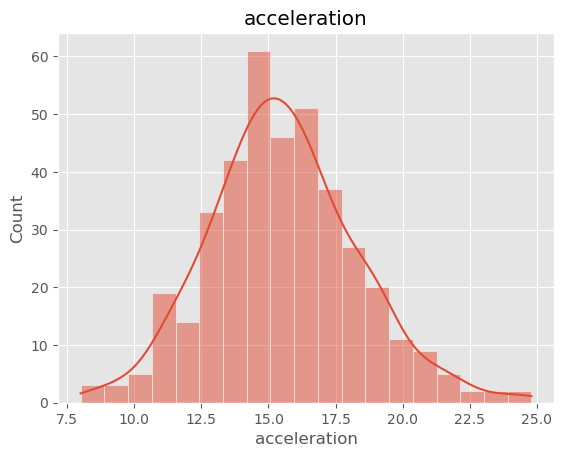

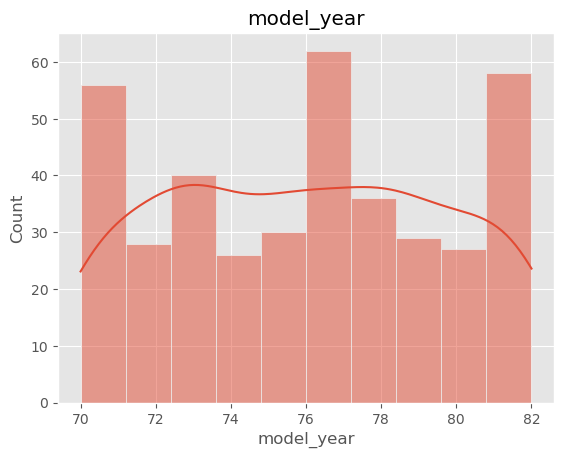

In [30]:
for col in featured.columns:
    sns.histplot(df2[col],kde=True)
    plt.title(col)
    plt.show()

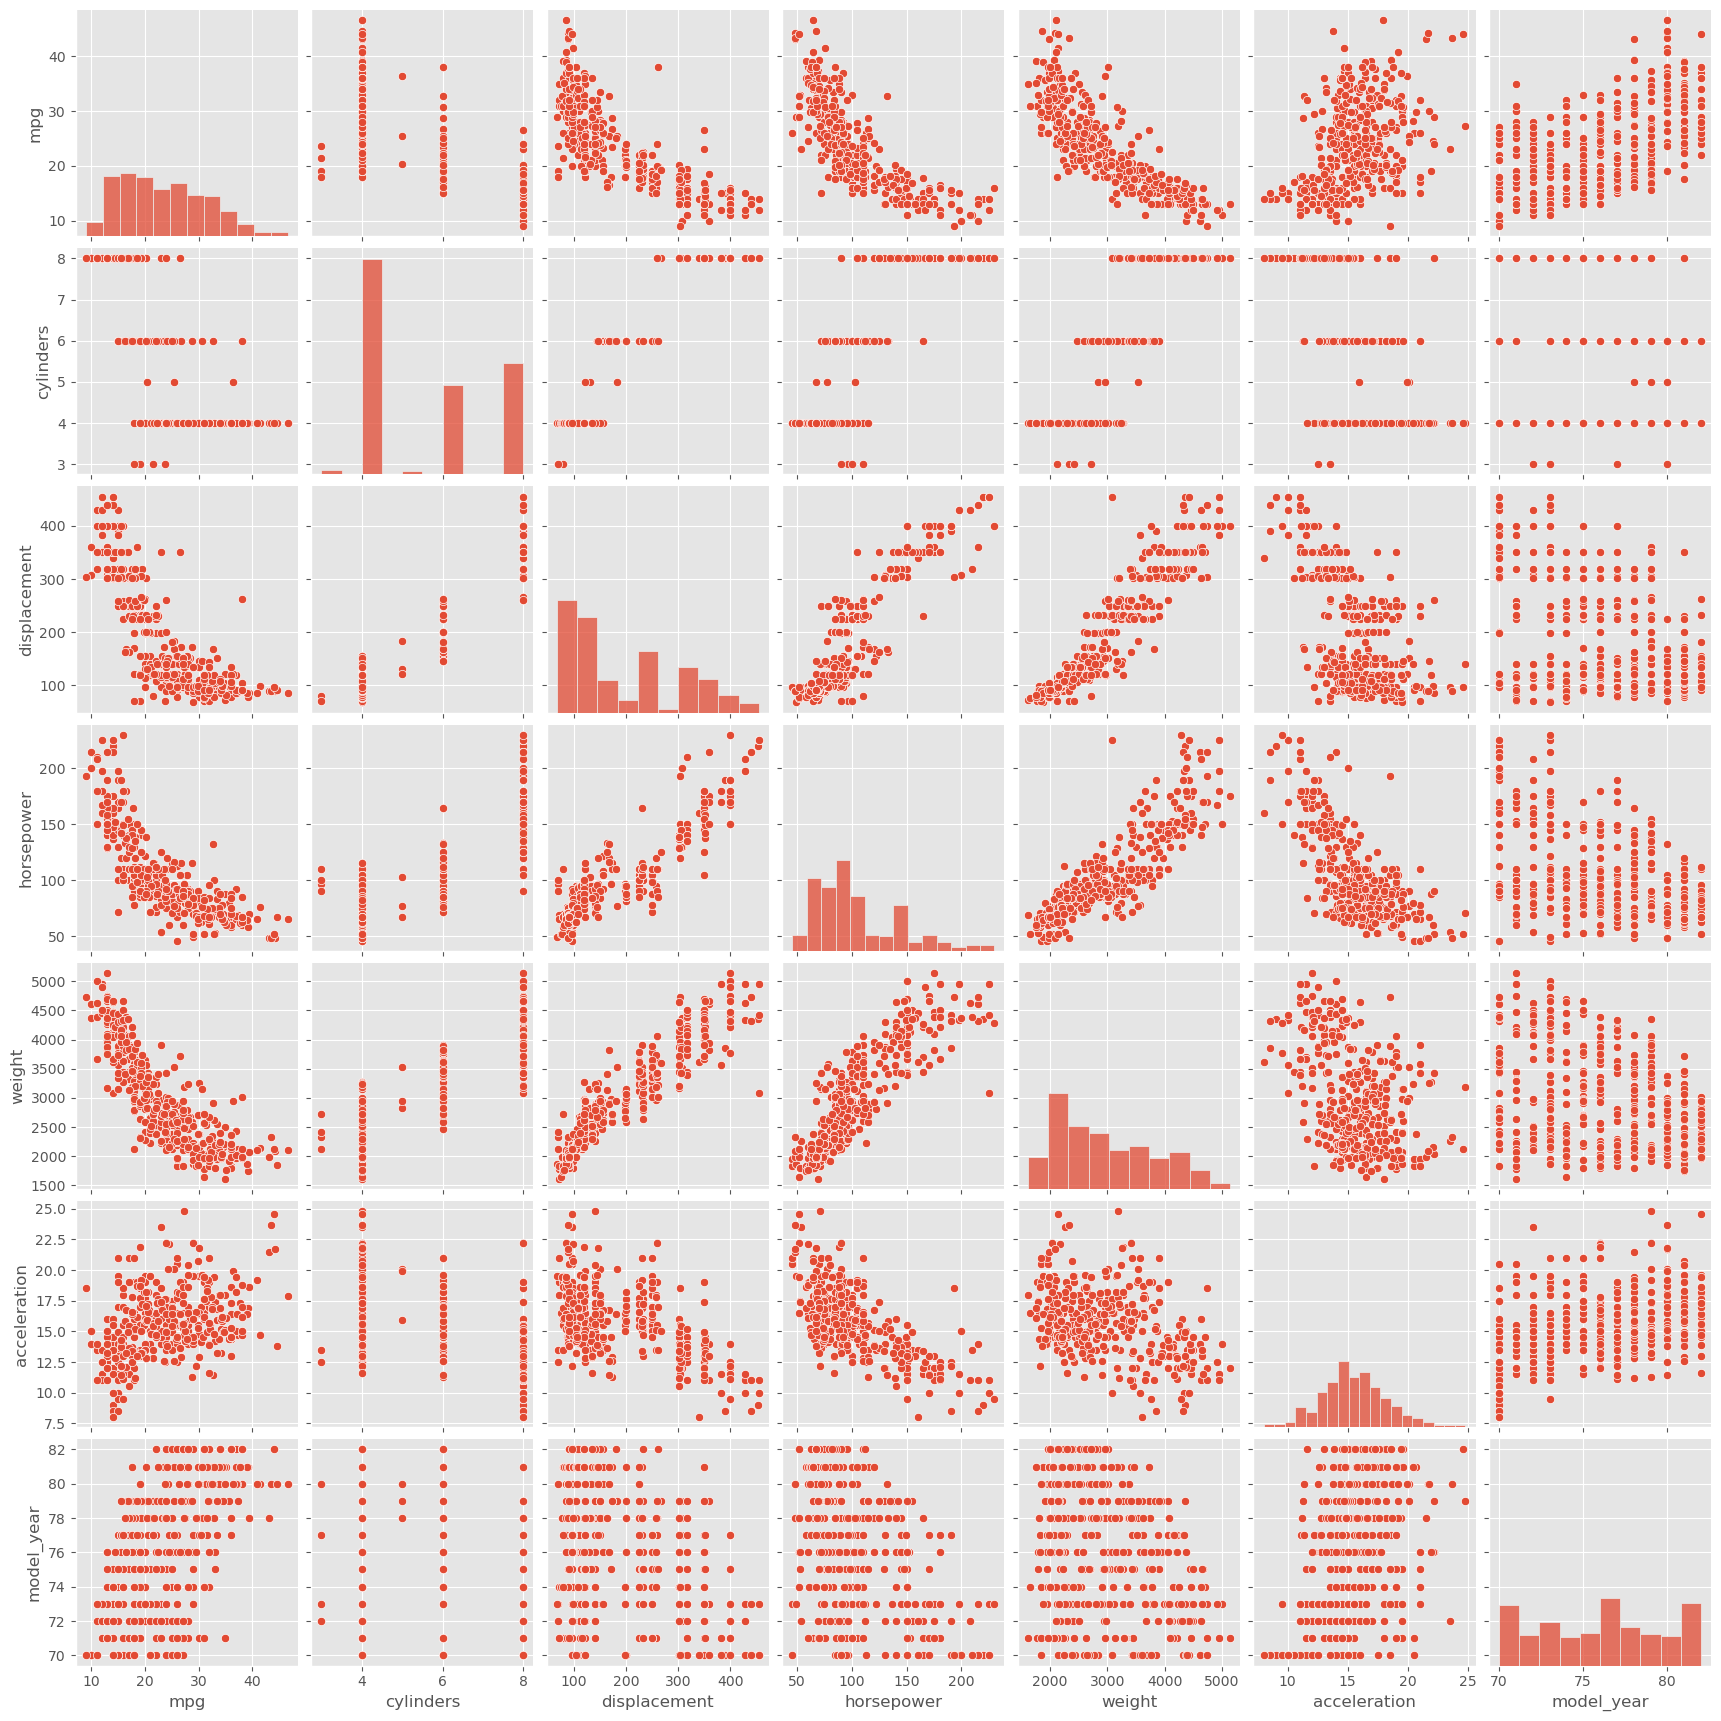

In [31]:
sns.pairplot(featured)
plt.show()

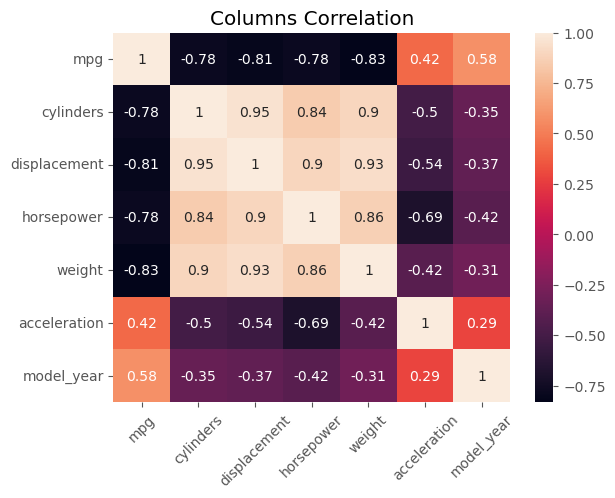

In [29]:
sns.heatmap(df2.corr(numeric_only=True),annot=True)
plt.xticks(rotation =45)
plt.title('Columns Correlation')
plt.show()

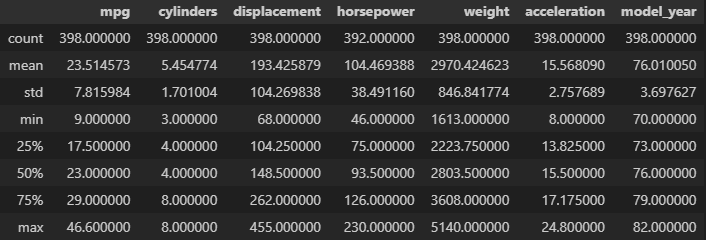

Based on that table we might wanna pick 
the top 25% or 75% for mpg, hp column, displace And The 25% for acceleration and weight

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
#Therefore


best_car = df2[
    (df2.mpg > 29) 
    & (df2.horsepower > 126) 
    & (df2.weight < 3608) # Using the 75% 
    & (df.acceleration <13.8) 
]

best_car

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
333,datsun 280-zx,32.7,6,168.0,132.0,2910,11.4,80,japan


Apparently, we only have one precise Car that actually really good

In [54]:
# what about the 50%

good_cars = df2[
    (df2.mpg > 23) 
    & (df2.horsepower > 93) 
    & (df2.weight < 3608) 
    & (df.acceleration <15.5) 
]
good_cars

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Class
14,toyota corona mark ii,24.0,4,113.0,95.0,2372,15.0,70,japan,1
23,bmw 2002,26.0,4,121.0,113.0,2234,12.5,70,europe,1
31,toyota corona,25.0,4,113.0,95.0,2228,14.0,71,japan,1
122,saab 99le,24.0,4,121.0,110.0,2660,14.0,73,europe,1
149,honda civic,24.0,4,120.0,97.0,2489,15.0,74,japan,1
171,toyota corona,24.0,4,134.0,96.0,2702,13.5,75,japan,1
180,saab 99le,25.0,4,121.0,115.0,2671,13.5,75,europe,1
267,toyota corona,27.5,4,134.0,95.0,2560,14.2,78,japan,1
268,datsun 510,27.2,4,119.0,97.0,2300,14.7,78,japan,1
273,datsun 200-sx,23.9,4,119.0,97.0,2405,14.9,78,japan,1


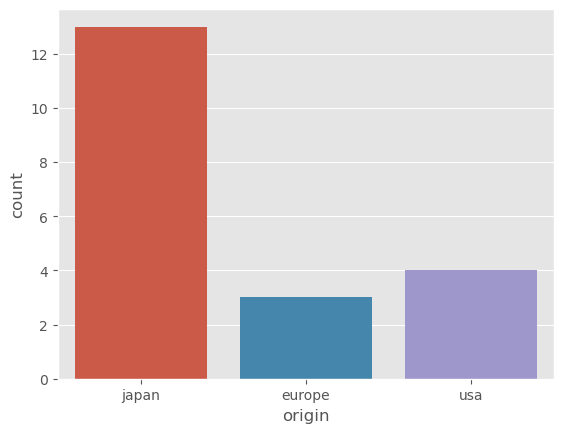

In [55]:
sns.countplot(data = good_cars,x=good_cars.origin)
plt.show()

'Good' Condition Cars are mostly from Japan

In [56]:
good_cars.groupby('origin').count().name

origin
europe     3
japan     13
usa        4
Name: name, dtype: int64

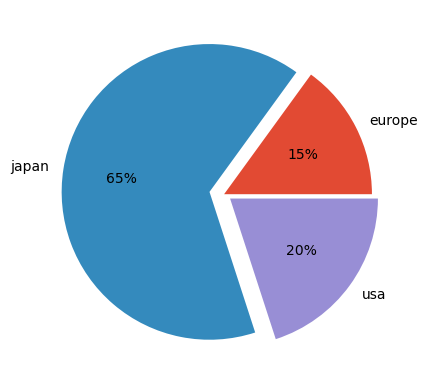

In [57]:
plt.pie(
    good_cars.groupby('origin').count().name,
    labels=good_cars.groupby('origin').count().name.index,
    explode=[0, 0.1, 0.05,], autopct='%.0f%%'
    )
plt.show()

The 'Good' cars earlier is made by looking up statistic. Next we can use Clustering to see whether the cars are good or not

In [40]:
#Clustering
features = ['mpg','horsepower','weight','acceleration']
X=df2[features]
X

,mpg,horsepower,weight,acceleration
0,18.0,130.0,3504,12.0
1,15.0,165.0,3693,11.5
2,18.0,150.0,3436,11.0
3,16.0,150.0,3433,12.0
4,17.0,140.0,3449,10.5
...,...,...,...,...
393,27.0,86.0,2790,15.6
394,44.0,52.0,2130,24.6
395,32.0,84.0,2295,11.6
396,28.0,79.0,2625,18.6


In [41]:
from sklearn.cluster import KMeans

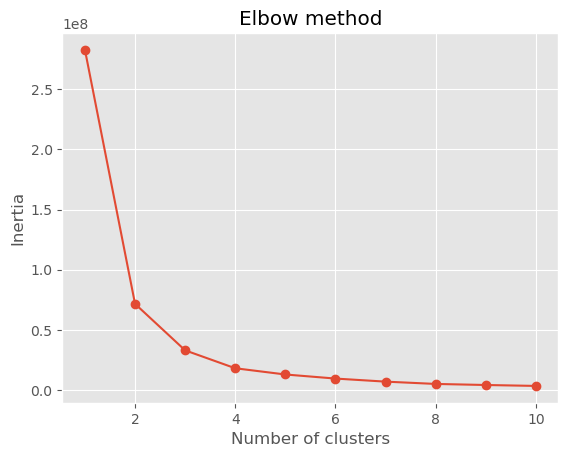

In [42]:
#To Get Best K

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Best K is shown at 2

In [43]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)

In [44]:
df2['Class'] = labels

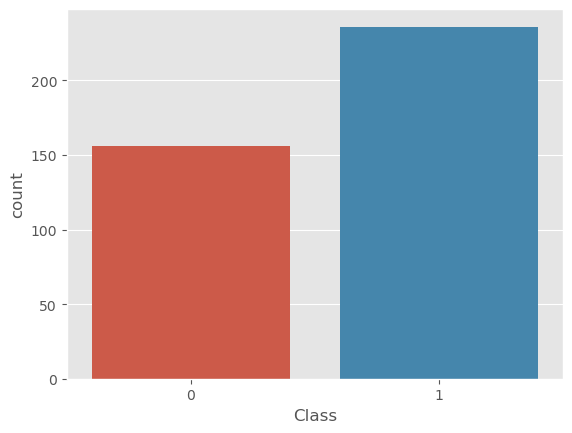

In [46]:
sns.countplot(data=df2,x=df2.Class)
plt.show()

In [48]:
class_1 = df2[df2.Class == 0]
class_2 = df2[df2.Class == 1]

In [49]:
class_1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Class
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,16.453846,7.237179,301.653846,137.564103,3879.532051,14.541667,74.762821,0.0
std,3.692790,1.107815,72.380059,36.943056,504.575701,3.098427,3.125570,0.0
min,9.000000,4.000000,120.000000,67.000000,3139.000000,8.000000,70.000000,0.0
25%,14.000000,6.000000,250.000000,105.000000,3431.500000,12.425000,72.000000,0.0
50%,16.000000,8.000000,305.000000,140.000000,3825.500000,14.000000,75.000000,0.0
75%,18.275000,8.000000,350.000000,155.750000,4282.000000,16.425000,77.000000,0.0
max,30.700000,8.000000,455.000000,230.000000,5140.000000,24.800000,81.000000,0.0


In [50]:
class_2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Class
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.0
mean,28.067797,4.305085,123.523305,82.593220,2381.381356,16.202119,76.783898,1.0
std,6.201316,0.771938,45.639318,18.900518,368.102932,2.286918,3.808154,0.0
min,14.000000,3.000000,68.000000,46.000000,1613.000000,10.000000,70.000000,1.0
25%,23.775000,4.000000,97.000000,70.000000,2106.000000,14.500000,73.000000,1.0
50%,27.100000,4.000000,112.000000,83.500000,2305.000000,16.000000,77.000000,1.0
75%,32.125000,4.000000,140.000000,92.000000,2671.250000,17.500000,80.000000,1.0
max,46.600000,8.000000,455.000000,225.000000,3121.000000,24.600000,82.000000,1.0


In [51]:
df2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.602041
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.490102
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


 Based on comparison between class '0' and class '1' with Raw data (df2) we can sumarize:
 - Class '0' consist cars that are 'not good'
 - Class '1' consist cars that are 'good'

In [53]:
df2[df2.name == 'datsun 280-zx']

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Class
333,datsun 280-zx,32.7,6,168.0,132.0,2910,11.4,80,japan,1


This shows up earlier hypothesis is correct. Which is car named Datsun 280-zx is included to the 'Good' Cars

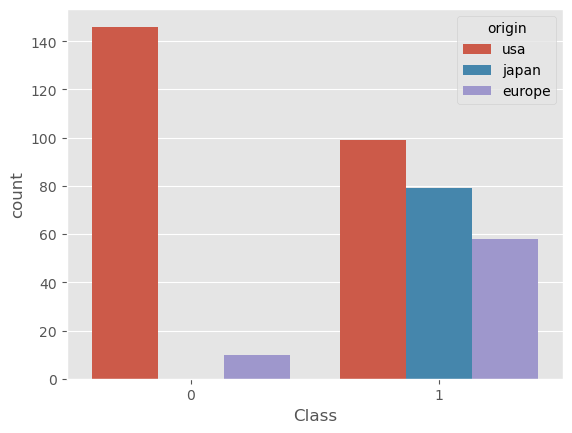

In [36]:
sns.countplot(data=df2,x=df2.Class,hue=df2.origin)
plt.show()

There is no 'bad' car made by japan

In [59]:
df2.to_csv('Processed Automoblie.csv',index=False,encoding='utf-8')